[2.73840641 1.25533947 1.49246361 1.05796692 3.47147364 3.27546877
 1.48825623 0.83502855 1.82514679 1.23587128 2.35871319 2.22516334
 0.02914781 1.41475086 0.         1.10211835 2.62565094 1.10109864
 3.69077051 1.77940336 2.95827501 0.54474508 0.53495209 1.13390753
 0.65857011 0.80473076 2.31482857 2.86773711 0.89470228 0.92698148
 0.80448586 5.14992005 0.81551721 3.04280973 3.48917351 1.3999686
 1.61130096 2.57890714 2.72417125 0.         1.25593273 1.73196336
 4.00383477 1.29197862 2.08412935 3.87725172 0.3938389  0.
 0.15617964 1.95423381 0.56300208 2.18237775 0.         1.51651632
 1.86162765 0.58576198 1.86329176 4.31420625 3.22403073 1.19218309
 1.9144179  1.03539309 3.69357214 0.         2.60450103 2.61646721
 0.         1.76707834 2.94063815 0.45766134 1.67077204 2.75813779
 2.28038571 2.17589174 3.59374414 2.7528433  3.91820065 3.09600272
 0.89525919 1.64751543 1.31384425 1.18053197 0.30875399 2.14248826
 9.23390129 2.58635926 1.12912903 2.28663047 4.57617346 0.21253141
 1.6

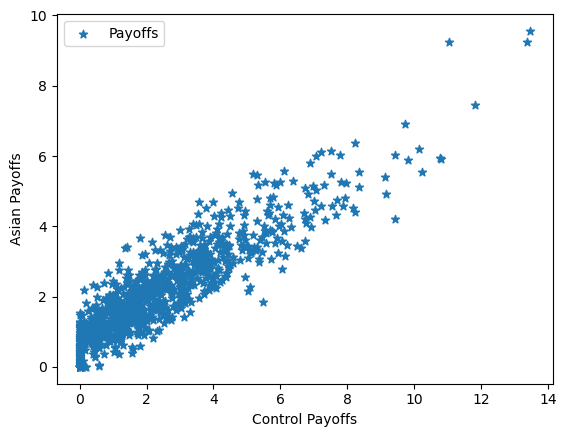

0.904712541513586
Control variate price estimate
2.127241679396013
Variance ratio of payoffs (varAsianPayoff/Var(Y))
5.509787063664713


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Inputs
n = 1000
T = 2
M = 5
sigma = 0.25
k = 4
r = 0.04
S0 = 6

# Simulation of GBM
Z = np.random.normal(0, 1, size=(n, M))
S = np.exp(
    np.cumsum((r - 0.5 * (sigma ** 2)) * (T / M) + sigma * np.sqrt(T / M) * Z, axis=1)
    + np.log(S0)
)

# Option payoffs
Asian_Payoffs = np.exp(-r * T) * np.maximum(np.mean(S, axis=1) - k, 0)
Control_Payoffs = np.exp(-r * T) * np.maximum(S[:, -1] - k, 0)
print(Asian_Payoffs)
print(Control_Payoffs)

# Estimate prices by crude Monte Carlo
Asian_PriceEst = np.mean(Asian_Payoffs)
Control_PriceEst = np.mean(Control_Payoffs)
print(Asian_PriceEst)

# Price est using control variate
#print('CMC price estimate')
print(Asian_PriceEst)

# Plots payoffs to show correlation
plt.scatter(Control_Payoffs, Asian_Payoffs, marker='*', label='Payoffs')
plt.xlabel('Control Payoffs')
plt.ylabel('Asian Payoffs')
plt.legend()
plt.show()

# Control mean (Calculated using Black-Scholes)
d1 = (1 / (sigma * np.sqrt(T))) * (np.log(S0 / k) + (r + 0.5 * sigma ** 2) * T)
d2 = d1 - sigma * np.sqrt(T)
Control_Mean = norm.cdf(d1) * S0 - norm.cdf(d2) * k * np.exp(-r * T)

# Calculates Y_i's
covariance = np.cov([Asian_Payoffs, Control_Payoffs], ddof=0)
alfa = -covariance[0, 1] / covariance[1, 1]
Y = Asian_Payoffs + alfa * (Control_Payoffs - Control_Mean)

# Prints correlation coefficient
#print('Correlation of payoffs')
rho = np.corrcoef(Asian_Payoffs, Control_Payoffs)[0, 1]
print(rho)

# Price est using control variate
print('Control variate price estimate')
print(np.mean(Y))

# Checks variances
print('Variance ratio of payoffs (varAsianPayoff/Var(Y))')
var_ratio = np.var(Asian_Payoffs) / np.var(Y)
print(var_ratio)
